In [7]:
import networkx as nx
import configparser
import matplotlib.pyplot as plt
import pandas as pd

config = configparser.ConfigParser()
config.read("../config.ini")
kg_path = "../data/knowlegegraph_short_words.csv"
train_path = "../"+config["Paths"]["TrainDataPath"]
ent_vocab_path = "../"+config["Paths"]["EntVocabPath"]
rel_vocab_path = "../"+config["Paths"]["RelVocabPath"]

G = nx.Graph()
ke = pd.read_csv(kg_path)

"""
with open(train_path, "r") as f:
    for i, line in enumerate(f):
        head, relation, tail = line.strip().split(" ")
        G.add_nodes_from([head, tail])
        G.add_edge(head, tail)
"""

for head, relation, tail in ke[["head", "relation", "tail"]].values:
    #G.add_nodes_from([head, tail])
    G.add_edge(head, tail, relation=relation)





In [8]:
print(G.number_of_edges())
print(G.number_of_nodes())

278438
158335


In [9]:

import pickle
with open(ent_vocab_path, "rb") as f:
        ent_vocab = pickle.load(f)
with open(rel_vocab_path, "rb") as f:
        rel_vocab = pickle.load(f)

In [10]:
head = "men"
tail = "to touchdown"
target = tail
print(target)
print(G.adj[target])
print(G.degree[target])

to touchdown
{'you': {'relation': 'do you go'}, 'twister': {'relation': 'is to'}}
2


In [11]:
def find_nodes_related_edge(G, name_of_relation, shortest_nodes):
    nx.get_edge_attributes(G,"relation")
    _map = set()
    for k, v in nx.get_edge_attributes(G,"relation").items():
        if v == name_of_relation:
            if k[0] in shortest_nodes or k[1] in shortest_nodes:
                _map.add(k[0])
                _map.add(k[1])
    return list(_map)

head = "man"
relation = "like"
tail = "to touchdown"
shortest_nodes = nx.shortest_path(G, head, tail)
linked_nodes= find_nodes_related_edge(G, relation, shortest_nodes)
sub = G.subgraph(linked_nodes+shortest_nodes)

nx.nx_agraph.view_pygraphviz(sub, prog='fdp')  # pygraphvizが必要
plt.show()

{('to touchdown',
  'you'): Text(0.4994005841836328, 0.2391423299756124, 'do you go'),
 ('man',
  'you'): Text(-0.5000000000000001, -0.23942930394572184, "'re following"),
 ('man', 'man'): Text(-0.9988011683672657, -0.47828465995122477, 'sell'),
 ('you',
  'you'): Text(-0.0011988316327343975, -0.0005739479402189462, "'ll know")}

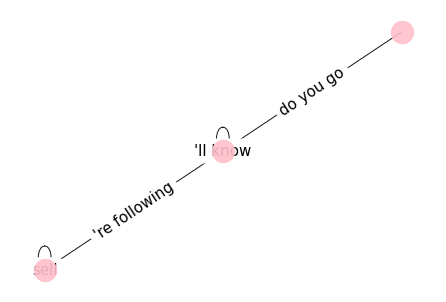

In [163]:
shortest_sub = G.subgraph(shortest_nodes)
pos = nx.spring_layout(shortest_sub)
plt.figure() 
nx.draw(shortest_sub,pos,edge_color='black',width=1,linewidths=1,\
node_size=500,node_color='pink',alpha=0.9)
nx.draw_networkx_edge_labels(shortest_sub, pos = pos, edge_labels=nx.get_edge_attributes(shortest_sub, "relation"),font_color='black',font_size=15)